In [1]:
%run twisted_graphene.py

In [2]:
g=TwistedBilayerGraphene(0,1)

In [3]:
g.calc_hops(3.36)

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


In [4]:
radius=0.02
versor=lambda pi,pf: (pf-pi)/np.linalg.norm(pf-pi)

g.set_kpath([g.K[0]+versor(g.K[0],g.M[0])*radius,g.K[0],g.K[0]+versor(g.K[0],g.Gamma)*radius],[100,100])

In [5]:
g.set_hamiltonian(1.0,0.0)

In [6]:
g.calc_bands(4,0.0)

In [7]:
def parabolic_fit_with_R2(x,y):
    p,residuals,rank,singular_values,rcond=np.polyfit(x,y,2,full=True)
    a,b,c=p
    R2=(np.corrcoef(y,a*x**2+b*x+c)[0,1])**2
    return a,b,c,R2

for j in range(g.bands.shape[1]):
    a,b,c,R2=parabolic_fit_with_R2(g.ell,g.bands[:,j])
    print(a,b,c,R2)

-107.61460493941502 4.286588582210234 -0.3586600667024268 0.9990015063152216
-107.61460493941537 4.286588582210239 -0.043160066702426905 0.9990015063152202
107.61460493941541 -4.286588582210242 0.043160066702426905 0.9990015063152202
107.61460493941469 -4.286588582210221 0.35866006670242684 0.99900150631522


In [8]:
g.set_kpath(g.path_GMKG,[100,100,100])

In [9]:
g.set_hamiltonian(1.0,0.0)

In [10]:
g.calc_bands(4,0.0)

In [11]:
np.sqrt(2)/2 * 0.3155 / 2.8922

0.07713580992474786

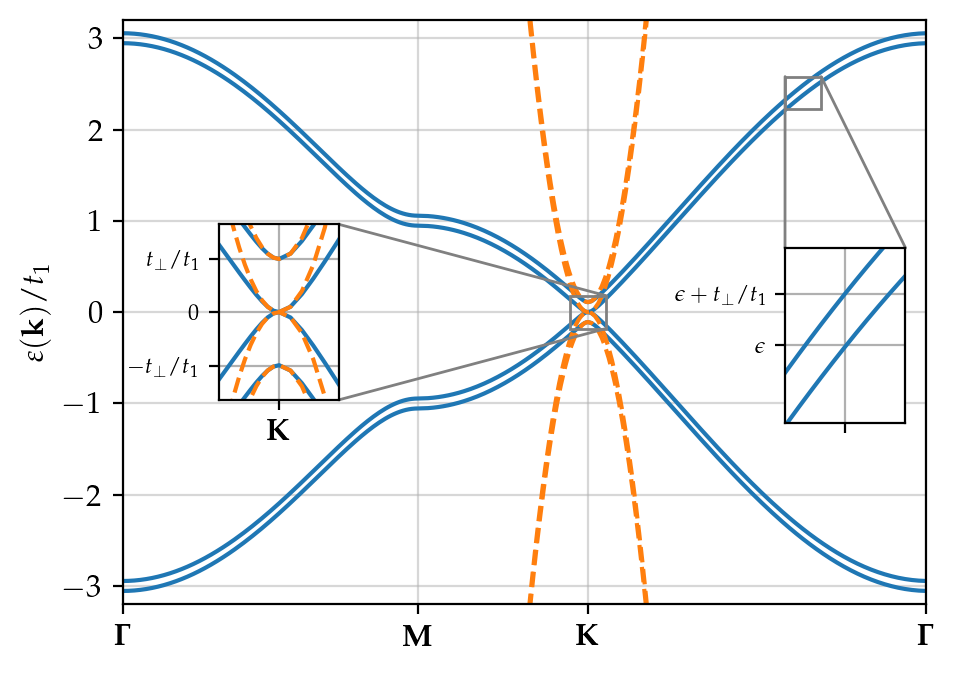

In [110]:
a,b=107.6146,4.2865885822102
c1=0.35866
c2=0.04316
tp=0.3155
t1=2.8922

fig,ax=plt.subplots(figsize=(4.9,3.5))

x=g.ell
plt.plot(x,g.bands/2.8922,color='tab:blue')
_x=x
x=x-2.326
Ktick=g.kticks[2]
y1=g.bands[Ktick,1]-g.bands[Ktick,0]
y2=g.bands[Ktick,3]-g.bands[Ktick,2]
plt.plot(_x,(-a*x**2)/2.8922,'--',color='tab:orange')
plt.plot(_x,(-a*x**2-y1)/2.8922,'--',color='tab:orange')
plt.plot(_x,(a*x**2)/2.8922,'--',color='tab:orange')
plt.plot(_x,(a*x**2+y2)/2.8922,'--',color='tab:orange')

plt.grid(True,alpha=0.5)
plt.xlim((g.ell[0],g.ell[-1]))
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.ylim((-3.2,3.2))
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')


#macaco pra fazer zoom dentro do plot (fit parabólico)
origin=(0.12,0.35)
width=0.15
height=0.3
axin=ax.inset_axes([origin[0],origin[1],width,height])

axin.plot(g.ell,g.bands/2.8922,color='tab:blue')

axin.plot(_x,(-a*x**2)/2.8922,'--',color='tab:orange')
axin.plot(_x,(-a*x**2-y1)/2.8922,'--',color='tab:orange')
axin.plot(_x,(a*x**2)/2.8922,'--',color='tab:orange')
axin.plot(_x,(a*x**2+y2)/2.8922,'--',color='tab:orange')

axin.set_yticks([-0.11,0,0.11],['$-t_{\perp}/t_1$','0','$t_{\perp}/t_1$'],fontsize=8)
axin.set_xticks([2.326],['$\mathbf{K}$'])

axin.grid(True)
ratio=1.2
axin.set_xlim((2.326-ratio*width/2,2.326+ratio*width/2))
axin.set_ylim((-ratio*height/2,ratio*height/2))

ax.indicate_inset_zoom(axin,alpha=1)



#macaco pra fazer zoom dentro do plot (proximidades de gamma)
origin=(0.825,0.31)
width=0.15
height=0.3
axin=ax.inset_axes([origin[0],origin[1],width,height])

axin.plot(g.ell,g.bands/2.8922,color='tab:blue')

# axin.plot(_x,(-a*x**2)/2.8922,'--',color='tab:orange')
# axin.plot(_x,(-a*x**2-y1)/2.8922,'--',color='tab:orange')
# axin.plot(_x,(a*x**2)/2.8922,'--',color='tab:orange')
# axin.plot(_x,(a*x**2+y2)/2.8922,'--',color='tab:orange')

axin.grid(True)
ratio=1.2
axin.set_xlim((3.4-ratio*width/2,3.4+ratio*width/2))
axin.set_ylim((2.4-ratio*height/2,2.4+ratio*height/2))


axin.set_yticks([2.4-ratio*height/2+0.16,2.4-ratio*height/2+0.265],['$\\epsilon$','$\\epsilon+t_{\perp}/t_1$'],fontsize=8)
axin.set_xticks([3.4],[''])


ax.indicate_inset_zoom(axin,alpha=1)


plt.savefig('Fig13_grapheneAB_band_structure.svg')

plt.show()

$$
\varepsilon(\mathbf{k}) = ak^2 = \dfrac{\hbar^2 v_F^2 k^2}{t_{\perp}} = \dfrac{\hbar^2 k^2}{2m}
$$

$$
[a] = eV A^2 = e_{adim} 10^{-20} J m
$$

In [107]:
a_si=a*constants.e*1e-20
tp_J=tp*constants.e

In [108]:
vfermi=np.sqrt(a_si*tp_J)/constants.hbar
vfermi/constants.c

0.002952900473098577

In [109]:
meff=constants.hbar**2/(2*a_si)
meff/constants.m_e

0.03540395184440458

In [ ]:
g.H(np.zeros(3)).todense()

In [85]:
g.bands[:,1]-g.bands[:,0]

array([0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
     

In [86]:
g.bands[:,3]-g.bands[:,2]

array([0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
       0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155, 0.3155,
     

In [87]:
from scipy import constants